[Kaggle - Predict Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn)

[Read csv from notebook 02062020_EDA](http://localhost:8888/notebooks/Kaggle/Customer-Segmentation/2_Telco-Customer-Churn/02062020_EDA.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

SEED = 1999

In [2]:
df_combined = pd.read_csv('./input/df_combined.csv')

display(df_combined.head())
print(df_combined.shape)

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.992611,No,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.066327,-0.259629,-0.172165,No,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,-1.236724,-0.362660,-0.958066,Yes,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0.514251,-0.746535,-0.193672,No,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,-1.236724,0.197365,-0.938874,Yes,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


(7043, 24)


# First of all, train_test_split

In [3]:
from sklearn.model_selection import train_test_split

X = df_combined.drop('Churn', axis=1)
y = df_combined['Churn']

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = 0.2,
                                                  stratify = y,
                                                  random_state = SEED)

print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_val.shape:', X_val.shape)
print('y_val.shape:', y_val.shape)

X_train.shape: (5634, 23)
y_train.shape: (5634,)
X_val.shape: (1409, 23)
y_val.shape: (1409,)


# 1) Test for different models using CV (find the best algorithm)

In [4]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Cross Validation
from sklearn.model_selection import cross_validate

In [5]:
models = [LogisticRegression(),
          GaussianNB(),
          KNeighborsClassifier(),
          SVC(),
          RandomForestClassifier(),
          XGBClassifier()]

# Perform cv across models
cv_result={}
for model in models:
    cv_result[model.__class__.__name__] = cross_validate(model, X, y,
                                                         cv=3,
                                                         scoring='accuracy',
                                                         return_train_score=1,
                                                         verbose=1)

display(cv_result)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished


{'LogisticRegression': {'fit_time': array([0.16001391, 0.03897858, 0.03198195]),
  'score_time': array([0.00599527, 0.00599575, 0.00299811]),
  'test_score': array([0.80366269, 0.8028109 , 0.8078398 ]),
  'train_score': array([0.8085197 , 0.80724175, 0.80366269])},
 'GaussianNB': {'fit_time': array([0.00799537, 0.00799489, 0.00699568]),
  'score_time': array([0.0059967 , 0.00399756, 0.00399733]),
  'test_score': array([0.75468484, 0.7427598 , 0.75159778]),
  'train_score': array([0.7514377 , 0.75079872, 0.75063884])},
 'KNeighborsClassifier': {'fit_time': array([0.03398061, 0.02798414, 0.02898312]),
  'score_time': array([0.20488238, 0.24787045, 0.20688033]),
  'test_score': array([0.7725724 , 0.75425894, 0.76991905]),
  'train_score': array([0.84451544, 0.84153355, 0.83752129])},
 'SVC': {'fit_time': array([0.59866953, 0.53770947, 0.54768705]),
  'score_time': array([0.16089511, 0.15490675, 0.15391111]),
  'test_score': array([0.80451448, 0.80025554, 0.80187473]),
  'train_score': arr

In [6]:
cv_result_df = pd.DataFrame(cv_result).T
cv_result_df = cv_result_df.applymap(lambda x: np.mean(x))   # apply np.mean to each cell

display(cv_result_df)

,fit_time,score_time,test_score,train_score
LogisticRegression,0.076991,0.004996,0.804771,0.806475
GaussianNB,0.007662,0.004664,0.749681,0.750958
KNeighborsClassifier,0.030316,0.219878,0.765583,0.841190
SVC,0.561355,0.156571,0.802215,0.815703
RandomForestClassifier,0.409098,0.042647,0.793839,0.998083
XGBClassifier,0.272852,0.009328,0.805338,0.823655


**LogisticRegression has the second best performance and fast**

# 2) GridSearch over LR (find the best hyperparams)

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": np.logspace(-3, 3, 7)}

lr = LogisticRegression()
clf = GridSearchCV(lr,
                   param_grid,
                   scoring='accuracy',
                   cv=3,
                   return_train_score=True)
clf.fit(X, y)

# save best model
best_model = clf.best_estimator_

print('best_params:', clf.best_params_)
print('best_score:', clf.best_score_)
print('best_estimator:', clf.best_estimator_)

print('\nmean_train_score:', clf.cv_results_['mean_train_score'][clf.best_index_])
print('std_train_score:', clf.cv_results_['std_train_score'][clf.best_index_])
print('mean_test_score:', clf.cv_results_['mean_test_score'][clf.best_index_])
print('std_test_score:', clf.cv_results_['std_test_score'][clf.best_index_])

best_params: {'C': 1.0}
best_score: 0.804771130010716
best_estimator: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

mean_train_score: 0.806474713333926
std_train_score: 0.002055706183896214
mean_test_score: 0.804771130010716
std_test_score: 0.0021975618094776535


**best params: {'C': 1}**

# 3) Model coefficients using LR

In [93]:
model_coef = pd.Series(np.squeeze(best_model.coef_),
                       index = df_combined.drop('Churn', axis=1).columns).sort_values(ascending=False)

model_coef

InternetService_Fiber optic              0.839192
TotalCharges                             0.683929
PaperlessBilling_Yes                     0.344116
PaymentMethod_Electronic check           0.307582
MultipleLines_Yes                        0.264617
StreamingMovies_Yes                      0.239127
StreamingTV_Yes                          0.228001
SeniorCitizen_Yes                        0.215488
Partner_Yes                             -0.001568
gender_Male                             -0.023149
DeviceProtection_Yes                    -0.033365
PaymentMethod_Mailed check              -0.055782
PaymentMethod_Credit card (automatic)   -0.087696
MonthlyCharges                          -0.109444
OnlineBackup_Yes                        -0.152728
Dependents_Yes                          -0.154028
TechSupport_Yes                         -0.361668
OnlineSecurity_Yes                      -0.384863
PhoneService_Yes                        -0.541254
Contract_One year                       -0.657028


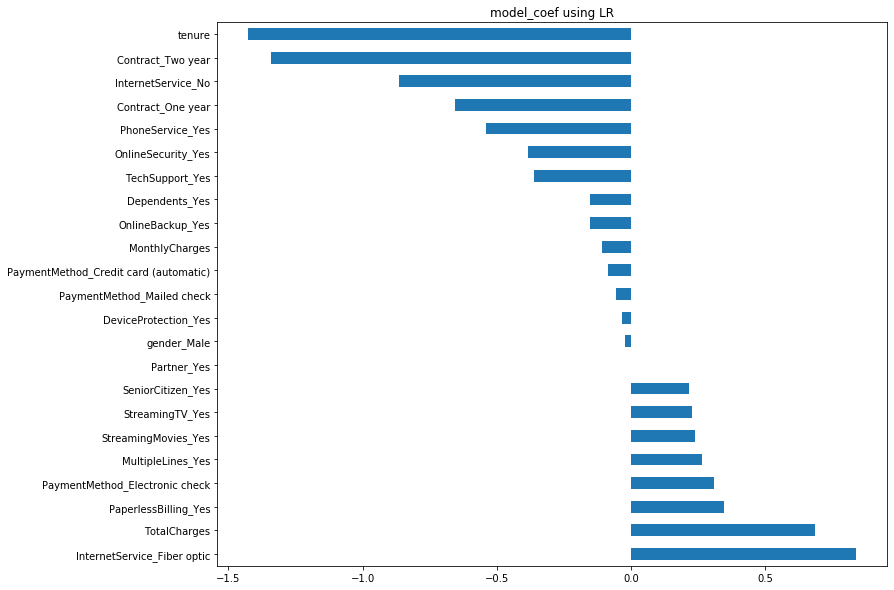

In [94]:
plt.figure(figsize=(12,10))
plt.title('model_coef using LR')

model_coef.plot(kind='barh')

**Observations:**

Negative model_coef means unlikeliness of churn happening.

+ve model_coef (lead to higher churn proability):
* InternetService using Fiber optic
* Higher TotalCharges 
* Using PaperlessBilling

-ve model_coef (lead to churn not happening):
* longer tenure
* Contract using Two year
* Without using internet service

# Feature importances using RandomForest

In [95]:
# Set RandomForest Hyperparams
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}

# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(X_train, y_train)

In [98]:
# Prediction & evaluation

from sklearn import metrics

y_val_pred = clf.predict(X_val)
print(metrics.accuracy_score(y_val, y_val_pred))

0.7977288857345636


In [57]:
# features importances
feature_importances = pd.Series(clf.feature_importances_,
                                index = X_train.columns).sort_values(ascending=False)

feature_importances

tenure                                   0.202992
TotalCharges                             0.153396
MonthlyCharges                           0.114112
InternetService_Fiber optic              0.106708
Contract_Two year                        0.077882
PaymentMethod_Electronic check           0.071189
Contract_One year                        0.039530
InternetService_No                       0.038923
OnlineSecurity_Yes                       0.027893
PaperlessBilling_Yes                     0.025510
TechSupport_Yes                          0.024893
SeniorCitizen_Yes                        0.012279
OnlineBackup_Yes                         0.012177
StreamingMovies_Yes                      0.011821
MultipleLines_Yes                        0.011153
Partner_Yes                              0.010272
Dependents_Yes                           0.010128
StreamingTV_Yes                          0.009614
gender_Male                              0.009089
DeviceProtection_Yes                     0.008795


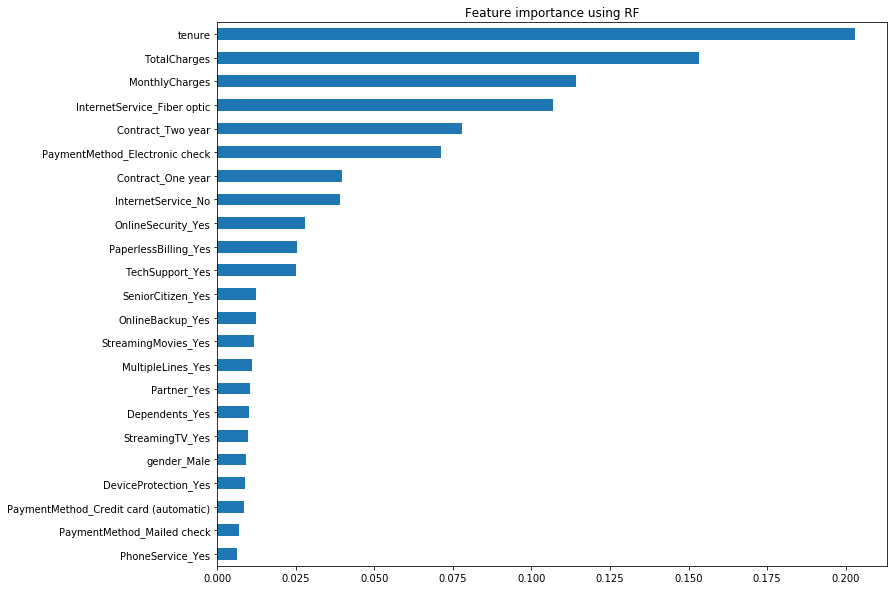

In [90]:
plt.figure(figsize=(12,10))
plt.title("Feature importance using RF")

feature_importances.sort_values(ascending=True).plot(kind='barh')

**Observations:**

* tenure, total charges, monthly contract are the most important predictor variables to predict churn